In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.metrics import r2_score, mean_squared_error

In [31]:
data = pd.read_csv(r"dataset\Expense_Categorization.csv")

## Data Analysis

In [32]:
data.columns

Index(['timestamp', 'merchant_name', 'merchant_category', 'amount',
       'is_recurring', 'user_balance_pre', 'label_category', 'label_urgency'],
      dtype='str')

In [33]:
data.shape

(10000, 8)

In [34]:
data.head()

,timestamp,merchant_name,merchant_category,amount,is_recurring,user_balance_pre,label_category,label_urgency
0,2025-11-24 03:01:47,HDFC Bank,Financial,1575.60,True,15150.49,Red,Critical
1,2025-10-07 02:37:27,Spotify,Subscriptions,220.27,False,14030.28,Yellow,Discretionary
2,2025-10-15 06:45:41,HP Petrol Pump,Fuel,481.92,False,18039.50,Orange,Necessary
3,2025-03-23 22:27:21,HDFC Bank,Financial,1546.32,True,6533.15,Red,Critical
4,2025-07-14 03:22:54,Bus Service,Commuting,307.20,False,11891.37,Orange,Necessary


In [35]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          10000 non-null  str    
 1   merchant_name      10000 non-null  str    
 2   merchant_category  10000 non-null  str    
 3   amount             10000 non-null  float64
 4   is_recurring       10000 non-null  bool   
 5   user_balance_pre   10000 non-null  float64
 6   label_category     10000 non-null  str    
 7   label_urgency      10000 non-null  str    
dtypes: bool(1), float64(2), str(5)
memory usage: 556.8 KB


In [36]:
data.describe()

,amount,user_balance_pre
count,10000.000000,10000.000000
mean,1303.654083,12470.442229
std,1133.118949,4321.293528
min,47.920000,5000.770000
25%,519.692500,8730.155000
50%,911.985000,12437.090000
75%,1699.075000,16221.077500
max,5401.250000,19995.170000


In [37]:
data.duplicated().sum()

np.int64(0)

In [38]:
data.head()

,timestamp,merchant_name,merchant_category,amount,is_recurring,user_balance_pre,label_category,label_urgency
0,2025-11-24 03:01:47,HDFC Bank,Financial,1575.60,True,15150.49,Red,Critical
1,2025-10-07 02:37:27,Spotify,Subscriptions,220.27,False,14030.28,Yellow,Discretionary
2,2025-10-15 06:45:41,HP Petrol Pump,Fuel,481.92,False,18039.50,Orange,Necessary
3,2025-03-23 22:27:21,HDFC Bank,Financial,1546.32,True,6533.15,Red,Critical
4,2025-07-14 03:22:54,Bus Service,Commuting,307.20,False,11891.37,Orange,Necessary


In [39]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [40]:
unique_categories = data['merchant_category'].unique()
unique_categories

<StringArray>
[    'Financial', 'Subscriptions',          'Fuel',     'Commuting',
     'Insurance',     'Utilities', 'Miscellaneous',      'Mortgage',
        'Travel', 'Entertainment',      'Shopping',        'Dining',
     'Education', 'Personal_Care',     'Groceries',    'Healthcare']
Length: 16, dtype: str

## Data Visualization

### 1. Target Distribution

In [41]:
fig = px.histogram(data, x='label_category', color='label_category',
                   color_discrete_map={'Red':'red','Orange':'orange','Yellow':'yellow'},
                   title='Transaction Count per Label Category',
                   width=800, height=450)
fig.show()


### 2. Amount Distributio per Category

In [42]:
fig = px.box(data, x='label_category', y='amount', color='label_category',
             color_discrete_map={'Red':'red','Orange':'orange','Yellow':'yellow'},
             title='Transaction Amount Distribution per Category',
             width=800, height=450)
fig.show()


### 3. User Balance Distribution per Category

In [43]:
fig = px.box(data, x='label_category', y='user_balance_pre', color='label_category',
             color_discrete_map={'Red':'red','Orange':'orange','Yellow':'yellow'},
             title='User Balance Before Transaction per Category',
             width=800, height=450)
fig.show()

### 4. Transaction Trends Over Time

In [44]:
daily_counts = data.groupby(data['timestamp'].dt.date)['label_category'].count().reset_index()
daily_counts.columns = ['date','count']

fig = px.line(daily_counts, x='date', y='count', title='Transactions Per Day')
fig.show()


### 6. Correlation Heatmap

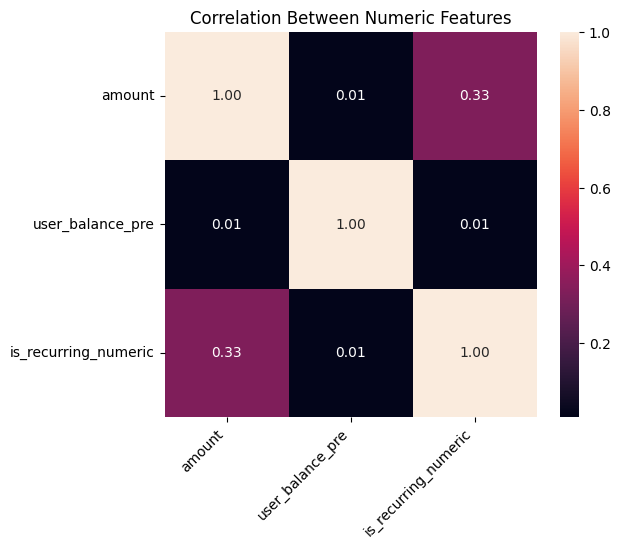

In [45]:
data['is_recurring_numeric'] = data['is_recurring'].astype(int)

# Select numeric columns for correlation
numeric_cols = ['amount', 'user_balance_pre', 'is_recurring_numeric']
corr = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Correlation Between Numeric Features')
plt.show()

## Encoding

### 1. Time based encoding

In [46]:
data['hour'] = data['timestamp'].dt.hour
data.hour

0        3
1        2
2        6
3       22
4        3
        ..
9995    15
9996     5
9997    20
9998    14
9999    12
Name: hour, Length: 10000, dtype: int32

In [47]:
data['day_of_week'] = data['timestamp'].dt.dayofweek
data.day_of_week

0       0
1       1
2       2
3       6
4       0
       ..
9995    6
9996    3
9997    0
9998    2
9999    5
Name: day_of_week, Length: 10000, dtype: int32

### 2. Binary encoding

In [48]:
data['is_recurring'] = data['is_recurring'].astype(int)   # True 1, False 0
data.is_recurring

0       1
1       0
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: is_recurring, Length: 10000, dtype: int64

### 3. Ordinal encoding

In [49]:
category_map = {'Red': 2, 'Orange': 1, 'Yellow': 0}
data['label_category_enc'] = data['label_category'].map(category_map)

In [50]:
urgency_map = {'Critical': 2, 'Necessary': 1, 'Discretionary': 0}
data['label_urgency_enc'] = data['label_urgency'].map(urgency_map)

### 4. Label encoding

In [51]:
le_merchant = LabelEncoder()
data['merchant_name'] = le_merchant.fit_transform(data['merchant_name'])
joblib.dump(le_merchant, 'merchant_name_encoder.pkl')

['merchant_name_encoder.pkl']

In [52]:
le_category = LabelEncoder()
data['merchant_category'] = le_category.fit_transform(data['merchant_category'])
joblib.dump(le_category, 'merchant_category_encoder.pkl')

['merchant_category_encoder.pkl']

In [53]:
# scaler = StandardScaler()

# # Dono bade numeric columns ko scale karo
# data['amount'] = scaler.fit_transform(data[['amount']])
# data['user_balance_pre'] = scaler.fit_transform(data[['user_balance_pre']])

# print("Scaling complete: Amount and Balance are now normalized!")

In [54]:
data.columns

Index(['timestamp', 'merchant_name', 'merchant_category', 'amount',
       'is_recurring', 'user_balance_pre', 'label_category', 'label_urgency',
       'is_recurring_numeric', 'hour', 'day_of_week', 'label_category_enc',
       'label_urgency_enc'],
      dtype='str')

In [55]:
data_final = data.drop(['timestamp', 'is_recurring_numeric',
                   'label_category', 'label_urgency'], axis=1)

data_final.to_csv('dataset/Encoded_Expense_Dataset.csv', index=False)

In [56]:
data_final.head()

,merchant_name,merchant_category,amount,is_recurring,user_balance_pre,hour,day_of_week,label_category_enc,label_urgency_enc
0,20,4,1575.60,1,15150.49,3,0,2,2
1,46,13,220.27,0,14030.28,2,1,0,0
2,23,5,481.92,0,18039.50,6,2,1,1
3,20,4,1546.32,1,6533.15,22,6,2,2
4,11,0,307.20,0,11891.37,3,0,1,1


### Split input var and target var

In [57]:
x = data_final.drop(columns=['label_category_enc', 'label_urgency_enc'])
y = data_final['label_category_enc']

In [58]:
x.head()

,merchant_name,merchant_category,amount,is_recurring,user_balance_pre,hour,day_of_week
0,20,4,1575.60,1,15150.49,3,0
1,46,13,220.27,0,14030.28,2,1
2,23,5,481.92,0,18039.50,6,2
3,20,4,1546.32,1,6533.15,22,6
4,11,0,307.20,0,11891.37,3,0


In [59]:
x.head()

,merchant_name,merchant_category,amount,is_recurring,user_balance_pre,hour,day_of_week
0,20,4,1575.60,1,15150.49,3,0
1,46,13,220.27,0,14030.28,2,1
2,23,5,481.92,0,18039.50,6,2
3,20,4,1546.32,1,6533.15,22,6
4,11,0,307.20,0,11891.37,3,0


In [60]:
print(x.shape) 
print(y.shape)

(10000, 7)
(10000,)


### Train-test split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [62]:
model = RandomForestClassifier(
    n_estimators=400,              # more trees = more stable importance
    max_features='sqrt',           # 🔥 balances feature competition
    min_samples_leaf=5,            # prevents overfitting on amount
    max_depth=None,
    class_weight={0: 10.0, 1: 2, 2: 2},
    random_state=42
)

model.fit(x_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",400
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [63]:
# model = RandomForestClassifier(
#     n_estimators=200, 
#     class_weight={0: 10.0, 1: 2, 2: 2}, 
#     max_depth=10,
#     min_samples_leaf= 5,
#     random_state=42
# )

# # Train the model
# model.fit(x_train, y_train)

In [64]:
y_pred = model.predict(x_test)

#### Verify

In [65]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R2 Score: 0.9930881919823795
Mean Squared Error: 0.0045


In [66]:
compare_df = pd.DataFrame({
    'Actual category': y_test,
    'Predicted category': y_pred
})

compare_df

,Actual category,Predicted category
6252,0,0
4684,0,0
1731,1,1
4742,0,0
4521,2,2
...,...,...
6412,0,0
8285,0,0
7853,1,1
1095,0,0


In [67]:
fig = px.scatter(compare_df, x='Actual category', y='Predicted category',
                 title="Actual vs Predicted",
                 width=600, height=450)
fig.show()


In [68]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9985

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       605
           2       1.00      0.99      1.00       482

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
 [[913   0   0]
 [  0 605   0]
 [  2   1 479]]


In [69]:
joblib.dump(model, 'Expense_categorization.pkl')

['Expense_categorization.pkl']

In [70]:
importances = model.feature_importances_
feature_names = x.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': importances * 100
}).sort_values(by='Importance (%)', ascending=False)

print(feature_importance_df)

             Feature  Importance (%)
1  merchant_category       46.894964
2             amount       26.424530
0      merchant_name       20.088052
3       is_recurring        4.317909
4   user_balance_pre        1.118996
5               hour        0.722612
6        day_of_week        0.432937


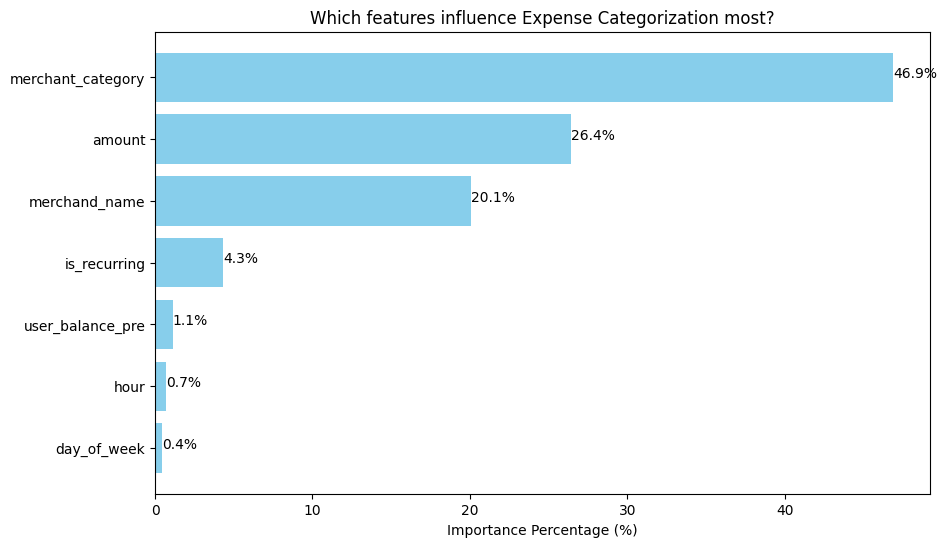

In [71]:
# 1. Get feature importance from your trained model
importances = model.feature_importances_
feature_names = ['merchand_name' ,'merchant_category', 'amount', 'is_recurring', 'user_balance_pre', 'hour', 'day_of_week']

# 2. Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': importances * 100
}).sort_values(by='Importance (%)', ascending=False)

# 3. Plot the graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance (%)'], color='skyblue')
plt.xlabel('Importance Percentage (%)')
plt.title('Which features influence Expense Categorization most?')
plt.gca().invert_yaxis()  # Highest importance at the top

# Display percentages on the bars
for index, value in enumerate(feature_importance_df['Importance (%)']):
    plt.text(value, index, f'{value:.1f}%')

plt.show()